***
# **| Sales Data Analysis |**
***
###### by `Jonathan Molina Rivera` <br>

##### In the following notebook we analyze a Sales Data Set
In 2020 data is of extreme value, just look at F.A.N.G companies, they have made their fortunes from it. Industries where data is created cannot afford to ignore it. The only right choice for them is to find new ways to use data for their benefit. The analysis of the data is where value can be both extracted and refined. The correct analysis of sales data can help us:
1. **Organize:** Data can help organize the next set of opportunities to focus on that may increase chances of incrementing sales and income. Algorithms can also assist in research and communication with other areas in the organization and help us plan timely followups — that can turn a lost opportunity into a potential one.
2. **Decide:**
Algorithms can help sales representatives decide between which product to suggest to the potential customer , when to recommend a product, etc.
3. **Act:**
Data can suggest not only the best opportunities to work on, but the next set of actions to take that improve the conversion rates — akin to 
4. **Optimize:**
Where is the next 10% improvement in revenue coming from? This is a question that is on every manager’s mind. Does it involve re-assessing the performance of lead-sources, or re-arranging workloads of the reps? Whatever your strategy is, data can help, with consistency.
5. **Drive Insights:**
Guide your team with data supported insights and not just by gut feel or even worse, none.

## Step One: Import Libraries
We import the libraries used in the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#From
from itertools import combinations
from collections import Counter

In [2]:
pwd

'C:\\Users\\jmoli\\Music\\Portfolio\\SalesAnalysis'

## Step Two: Reading DATA.
Using the pandas.read_csv() we read the load one uncleaned csv file.
### Test reading of one dataset file

In [3]:
df = pd.read_csv("./Files/Data/Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Merge sales data of 12 months
Using a similar method as before we load and merge the remianing datasets in a new CSV file.

In [4]:
root = './Files/Data'
files = [file for file in os.listdir(root) if not file.startswith('.')]
allMonths = pd.DataFrame()
for  doc in files:
    df = pd.read_csv(root+ "/" + doc)
    allMonths = pd.concat([allMonths, df])
                          
allMonths.head()
allMonths.to_csv("AllMonthsData.csv", index = False)

C:\Users\jmoli\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


### Read updated dataset

In [5]:
allData = pd.read_csv("./AllMonthsData.csv")

## Step Three:  Cleaning Code.
We first need to decide on what we must remove. From practice, I know that elements to "clean" are those that cause errors as you perform operations. In general operations are preformed, and based on the error, we decide how you should go about cleaning the data.

#### Data has too many NaN's. 
There are complete rows with NaN's; must remove them. Using .isna() remove all missing and null values.

In [6]:
nanDf = allData[allData.isna().any(axis=1)]
#nanDf.head()

In [7]:
allData = allData.dropna(how = 'all') #drop all rows with NaN
allData = allData.drop(columns = '{') 
#allData.head()

#### Dataset has duplicate titles, must remove them. ('Or')

In [8]:
allData = allData[allData['Order Date'].str[0:2] != 'Or']

#### Covert columns to correct type

In [9]:
allData['Quantity Ordered'] = pd.to_numeric(allData['Quantity Ordered']) #make int
allData['Price Each'] = pd.to_numeric(allData['Price Each']) #make float

#allData.head()
allData.dtypes

Order Date           object
Order ID             object
Price Each          float64
Product              object
Purchase Address     object
Quantity Ordered      int64
dtype: object

## Step Four: Augment data with new columns.
To preform  meaningfull analysis we have to add some new columns. We add a Month, Sales, and City Column.
#### Add 'Month' 

In [10]:
allData['Month'] = allData['Order Date'].str[0:2]
allData['Month'] = allData['Month'].astype('int32')

In [11]:
allData.head(50000) # 50000 to see if months are correct number

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,Month
0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,4
2,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,4
3,04/12/19 14:38,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,4
4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,4
5,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,4
...,...,...,...,...,...,...,...
50241,12/07/19 20:28,314630,150.00,Apple Airpods Headphones,"39 Washington St, San Francisco, CA 94016",2,12
50242,12/04/19 21:19,314631,149.99,27in FHD Monitor,"539 Elm St, San Francisco, CA 94016",1,12
50243,12/25/19 19:23,314632,3.84,AA Batteries (4-pack),"474 13th St, Austin, TX 73301",1,12
50244,12/24/19 13:09,314633,3.84,AA Batteries (4-pack),"16 Center St, Austin, TX 73301",1,12


#### Add a sales column

In [12]:
allData['Sales'] = allData['Quantity Ordered'] * allData['Price Each']
#allData.head()

#### Add a City Column

In [13]:
#Use .apply()
def getCity(address):
    return address.split(',')[1]

def getState(address):
    return address.split(',')[2].split(' ')[1]

allData['City'] = allData['Purchase Address'].apply(lambda x: getCity(x) + ', ' + getState(x))
allData.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,Month,Sales,City
0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,4,23.90,"Dallas, TX"
2,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,4,99.99,"Boston, MA"
3,04/12/19 14:38,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,4,600.00,"Los Angeles, CA"
4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,4,11.99,"Los Angeles, CA"
5,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,4,11.99,"Los Angeles, CA"


## Analysis 
Questions to be Answered
Now we proceed to explore and analyze the data. To do this task we pose some questions to answer.

### 1) Best month for sales? How much was earned?

In [14]:
results = allData.groupby('Month').sum()#.max()

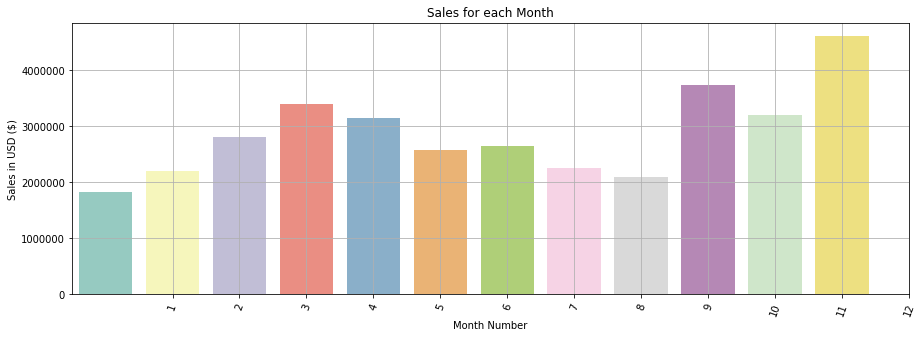

In [15]:
plt.figure(figsize=(15,5))
months = [1,2,3,4,5,6,7,8,9,10,11,12]
ax = sns.barplot(months, results['Sales'], palette = "Set3")
plt.xticks(months)
plt.xticks(rotation=70)

plt.title("Sales for each Month")
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.grid()
plt.show()

**Graph 1.** We plot using seaborn the Sales in USD per month.

#### 2) What city had highest number of sales?

In [16]:
results = allData.groupby('City').sum()#.max()

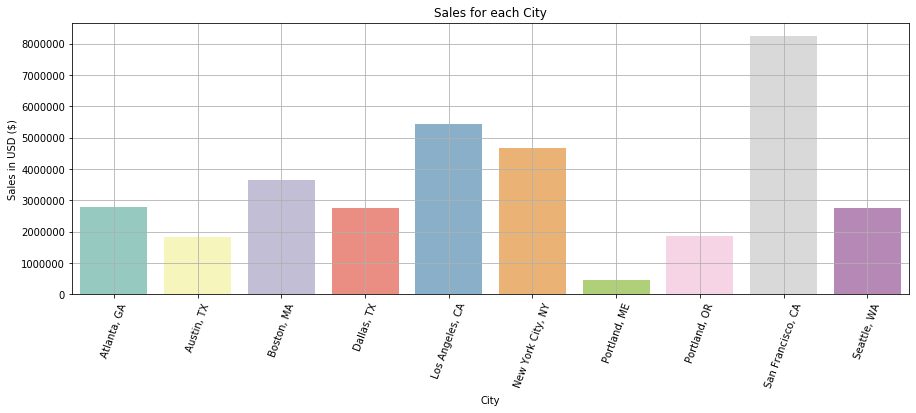

In [17]:
cities = [city for city, df in allData.groupby('City')]

#Graph
plt.figure(figsize=(15,5))
ax = sns.barplot(cities, results['Sales'], palette = "Set3")
#plt.xticks(cities)
plt.xticks(rotation=70)

plt.title("Sales for each City")
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.grid()
plt.show()

**Graph 2**. Using seaborn we also plot the sales of each city in USD per annum.

### 3) What time should we display ads to maxmize likelihood of customer buying product.
Knowing the time of day when the customers place their order is very important. We can better concentrate our efforts at certain times, maximizing the effectiveness. We can target these customer with offers, liquidations, etc.

In [18]:
allData['Order Date'] = pd.to_datetime(allData['Order Date'])
allData['Hour'] = allData['Order Date'].dt.hour
allData['Minute'] = allData['Order Date'].dt.minute
#allData.head()

Using pd.to_datetim we extract the time of the date in the Order Date Column. Furthermore we take the this newly extracted data and refine it obtaining the hour and minute of the order placed. Then we proceed to plot the information using a lineplot.

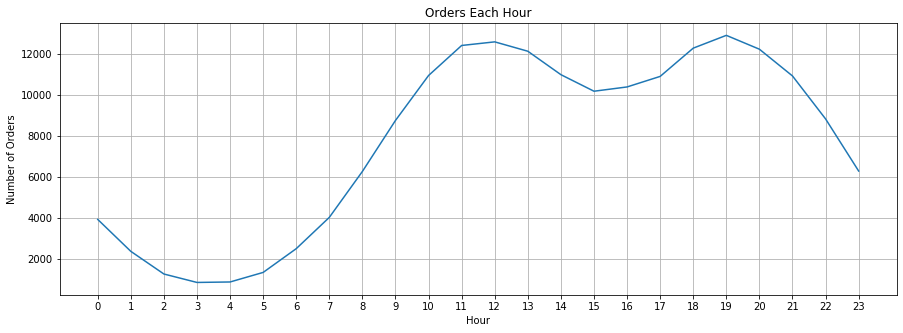

In [19]:
hours = [hour for hour, df in allData.groupby('Hour')]
d = allData.groupby(['Hour']).count()
#Graph
plt.figure(figsize=(15,5))
#plt.plot(hours, allData.groupby(['Hour']).count())
sns.lineplot(data=d, x=hours, y="Quantity Ordered")
plt.xticks(hours)

plt.title("Orders Each Hour")
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

**Graph 3.** The time of day where there are more orders placed is between 10-13:00 and 18 - 21:00. Around lunch time and dinner/supper.

###### Recomendation: between 11-13, and 18-20. 

### 4) Which items are most commonly bought together?
While some customers only buy one item, usually people buy more than one item at a time. The types of items bought together can give us better insight on the purchasing habits of the clients. Furthermore, knowing what items are bought together can give us on what items should be promotes or recommended together.

In [20]:
df = allData[allData['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head() 

C:\Users\jmoli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [21]:
count = Counter()
for row in df['Grouped']:
    rowList = row.split(',')
    count.update(Counter(combinations(rowList, 2))) #2 = pairs; 3 = three items
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### 5) What product sold the most, and why?
Knowing the which items are sold the most is a basic but very important insight to know. Not only to maintain inventory to understandthe buying habits of the comsumer.

In [22]:
productGroup = allData.groupby('Product')
quantityOrdered = productGroup.sum()['Quantity Ordered']
products = [product for product, df in productGroup]

#### Plot

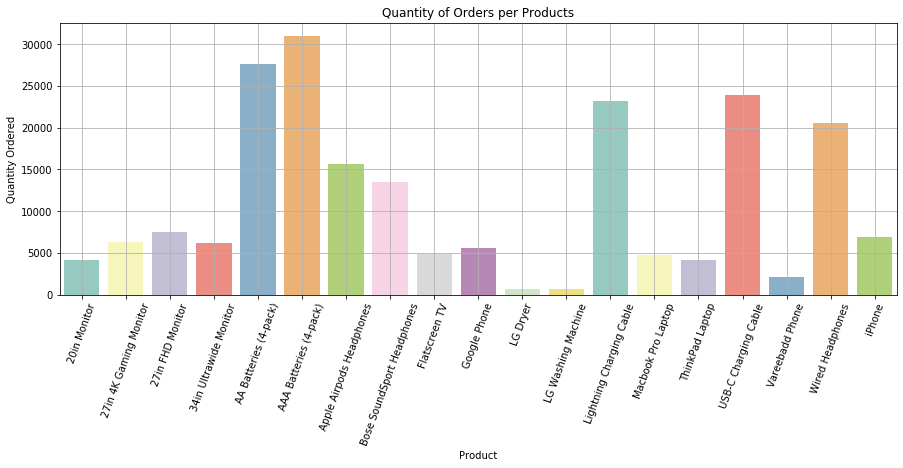

In [23]:
#plt.bar(products, quantityOrdered)
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(x=products, y=quantityOrdered, orient="v", palette = "Set3")
plt.xticks(rotation=70)

plt.title("Quantity of Orders per Products")
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.grid()
plt.show()

**Graph 4.** Quantity of Orders vs Type of Product.

#### What product sold the most? Why did it the most?
Usually the most sold objects (when they aren't totally in vogue or in a fad) are those with the lowest price, in this section we see if that is the case.

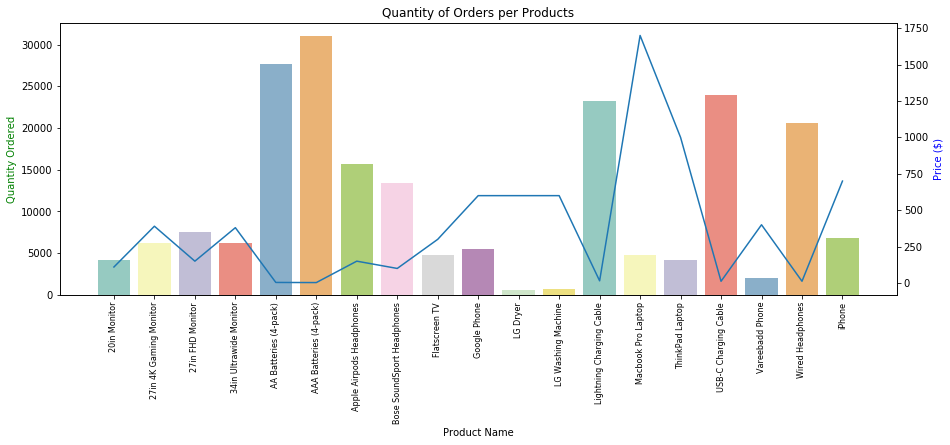

In [24]:
prices = allData.groupby('Product').mean()['Price Each']

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)
ax1 = sns.barplot(x = products, y = quantityOrdered, palette = "Set3")
plt.xticks(rotation=70)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = products, y = prices)

ax2.grid(False)
plt.xticks(rotation=70)

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.title("Quantity of Orders per Products")
plt.show()

**Graph 5.** Quantity of Orders vs Type and price of a product.